In [1]:
import pandas as pd

train = pd.read_csv("/Users/raekkkky/Desktop/DNA/winter 24/project7/train_fin.csv")
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,family_size,begin_month,credit,credit_card_count,before_EMPLOYED_year,Age,DAYS_BIRTH_month,EMPLOYED,begin_year,cluster
0,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,...,3.0,5.0,1.0,9,26,31,7.0,4,0.0,0
1,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,...,2.0,22.0,2.0,6,40,52,0.0,12,1.0,1
2,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,...,2.0,37.0,1.0,2,35,41,10.0,5,3.0,2
3,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,...,2.0,26.0,2.0,1,35,41,9.0,5,2.0,2
4,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,13413,...,4.0,18.0,1.0,1,23,36,3.0,13,1.0,0


In [7]:
cluster_counts = train.groupby('cluster').count()

# 최대 표시 행 수 설정 (여기서는 100으로 설정)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# 출력
print(cluster_counts)

         gender   car  reality  child_num  income_total  income_type  \
cluster                                                                
0          2086  2086     2086       2086          2086         2086   
1          1453  1453     1453       1453          1453         1453   
2          1848  1848     1848       1848          1848         1848   
3           688   688      688        688           688          688   

         edu_type  family_type  house_type  DAYS_BIRTH  DAYS_EMPLOYED  \
cluster                                                                 
0            2086         2086        2086        2086           2086   
1            1453         1453        1453        1453           1453   
2            1848         1848        1848        1848           1848   
3             688          688         688         688            688   

         occyp_type  family_size  begin_month  credit  credit_card_count  \
cluster                                             

In [8]:
for column in train.columns:
    if column != 'cluster':  # 'cluster' 열은 이미 클러스터 기준으로 그룹화되었으므로 제외
        counts_per_cluster = train.groupby(['cluster', column]).size().unstack(fill_value=0)
        print(f"\nCounts for {column} in each cluster:\n{counts_per_cluster}")


Counts for gender in each cluster:
gender      F    M
cluster           
0        1160  926
1         881  572
2        1131  717
3         498  190

Counts for car in each cluster:
car         N    Y
cluster           
0        1208  878
1         904  549
2        1052  796
3         444  244

Counts for reality in each cluster:
reality    N     Y
cluster           
0        834  1252
1        397  1056
2        625  1223
3        229   459

Counts for child_num in each cluster:
child_num     0    1    2   3  4  5
cluster                            
0          1148  604  289  36  7  2
1          1284  137   29   3  0  0
2           979  544  273  47  5  0
3           492  133   55   7  1  0

Counts for income_total in each cluster:
income_total  27000.0    31500.0    32400.0    36000.0    36900.0    \
cluster                                                               
0                     0          0          0          2          0   
1                     1          0        

In [11]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"

# 'cluster' 변수의 값의 개수를 세기
cluster_counts = train['cluster'].value_counts()

# 원 그래프로 표시
fig = px.pie(cluster_counts, names=cluster_counts.index, values=cluster_counts.values, title='Cluster Value Counts')
fig.show()


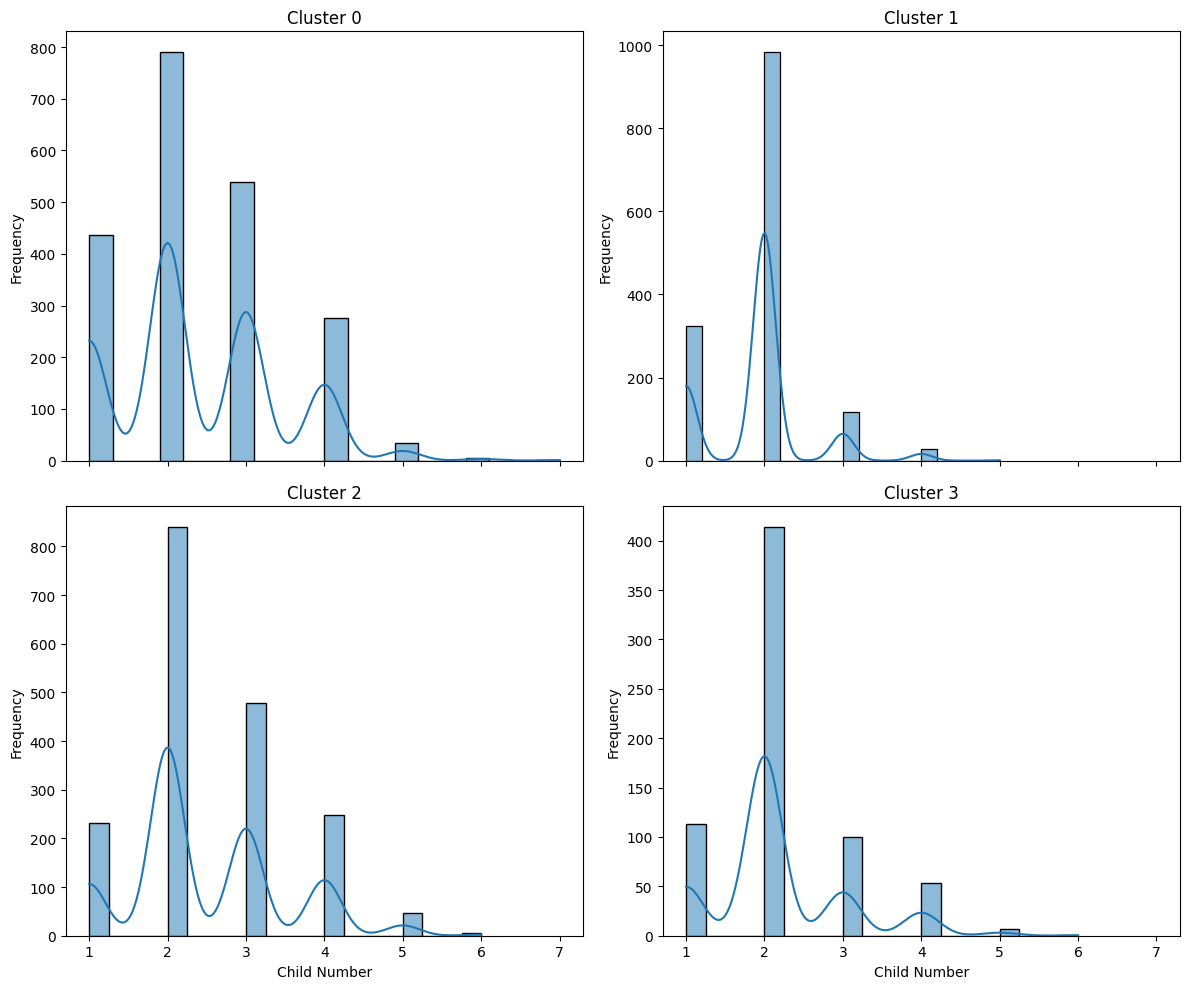

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 클러스터 별 child_num의 분포 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

for cluster_id, ax in zip(sorted(train['cluster'].unique()), axes.flatten()):
    sns.histplot(train[train['cluster'] == cluster_id]['family_size'], bins=20, kde=True, ax=ax)
    ax.set_title(f'Cluster {cluster_id}')
    ax.set_xlabel('Child Number')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [14]:
# 각 클러스터에서 family_size가 2일 때의 비율 출력
for cluster_id in sorted(train['cluster'].unique()):
    total_count = len(train[train['cluster'] == cluster_id])
    family_size_2_count = len(train[(train['cluster'] == cluster_id) & (train['family_size'] == 2)])

    ratio = family_size_2_count / total_count
    print(f'Cluster {cluster_id}: Family Size 2 Ratio = {ratio:.2%}')


Cluster 0: Family Size 2 Ratio = 37.92%
Cluster 1: Family Size 2 Ratio = 67.72%
Cluster 2: Family Size 2 Ratio = 45.45%
Cluster 3: Family Size 2 Ratio = 60.17%


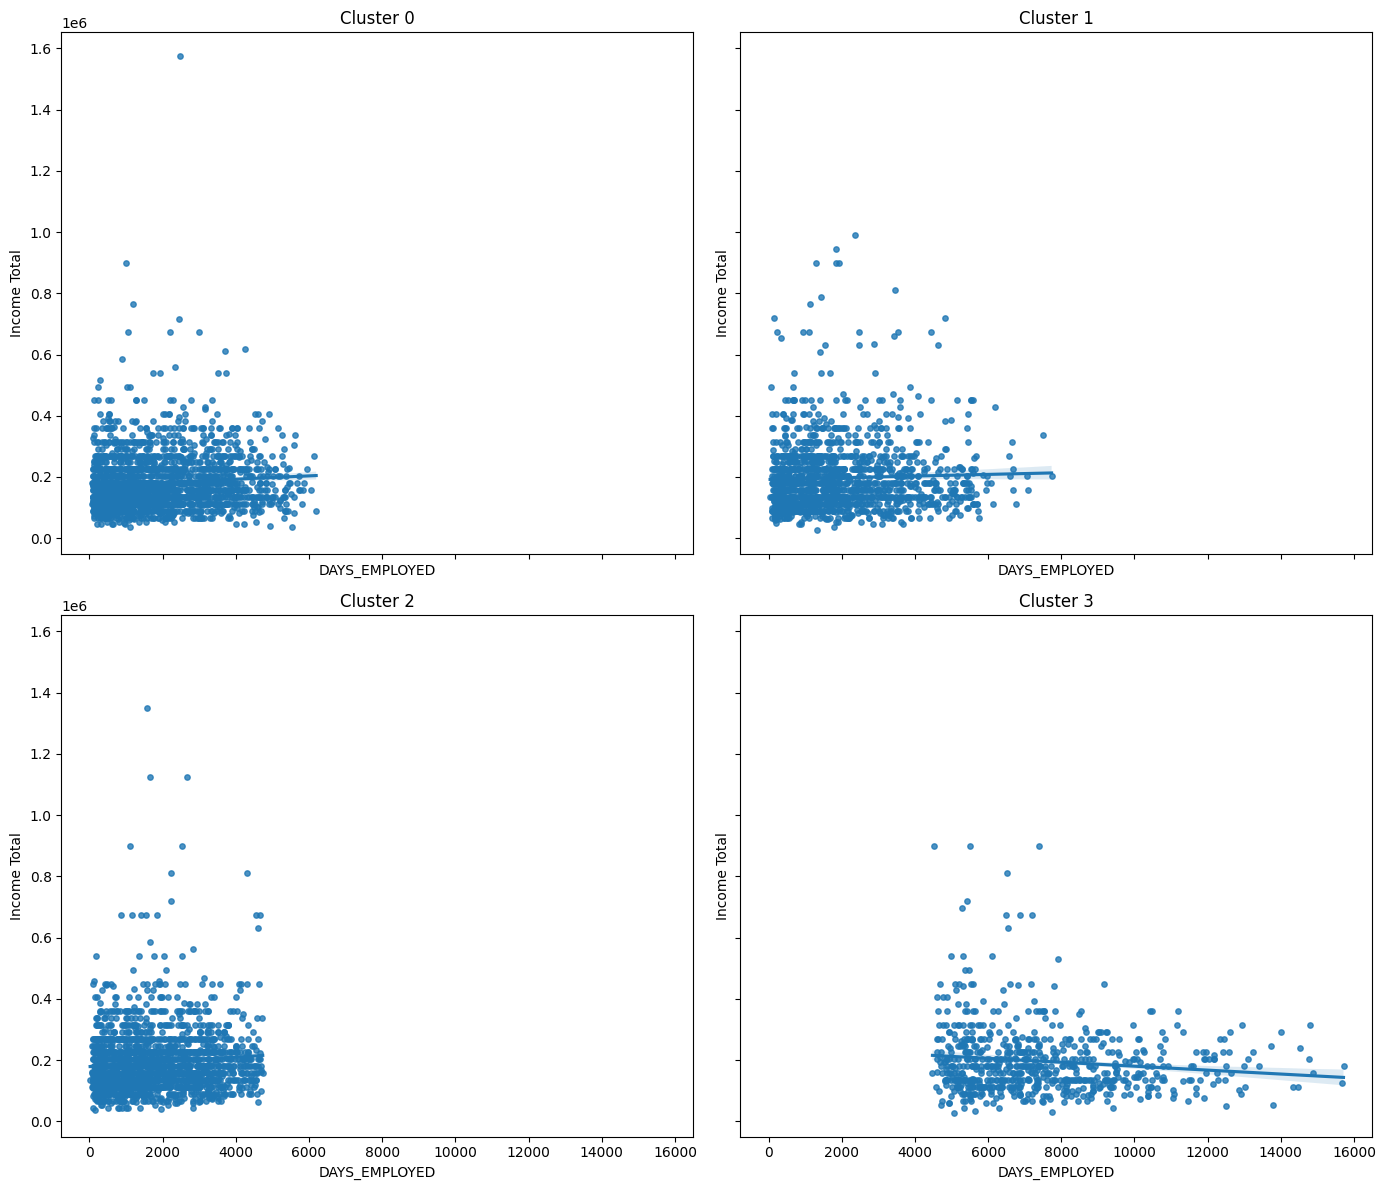

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4개의 서브플롯으로 각 클러스터 별 DAYS_EMPLOYED와 income_total 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True, sharey=True)

for cluster_id, ax in zip(sorted(train['cluster'].unique()), axes.flatten()):
    cluster_data = train[train['cluster'] == cluster_id]
    sns.regplot(x='DAYS_EMPLOYED', y='income_total', data=cluster_data, ax=ax, scatter_kws={'s': 15})
    ax.set_title(f'Cluster {cluster_id}')
    ax.set_xlabel('DAYS_EMPLOYED')
    ax.set_ylabel('Income Total')

plt.tight_layout()
plt.show()


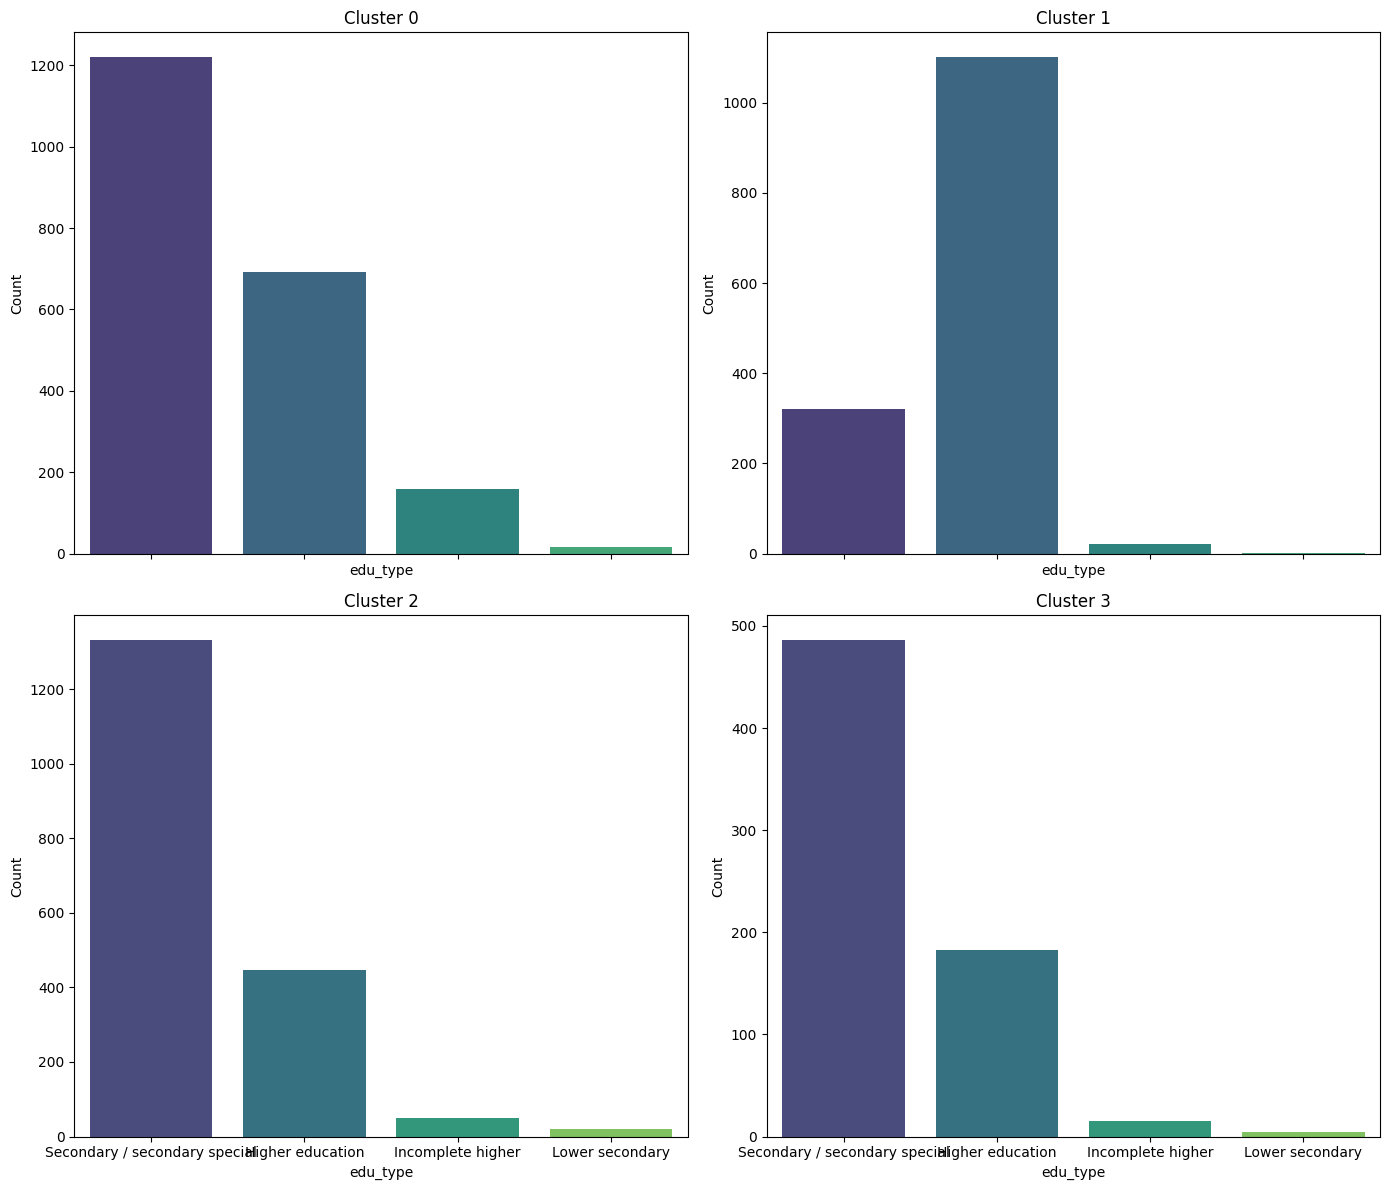

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4개의 서브플롯으로 클러스터별 edu_type 막대그래프 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True)

for cluster_id, ax in zip(sorted(train['cluster'].unique()), axes.flatten()):
    cluster_data = train[train['cluster'] == cluster_id]
    sns.countplot(x='edu_type', data=cluster_data, ax=ax, palette='viridis')
    ax.set_title(f'Cluster {cluster_id}')
    ax.set_xlabel('edu_type')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [25]:
# 각 클러스터별 credit_card_count가 5 이상인 비율 출력
for cluster_id in sorted(train['cluster'].unique()):
    total_count = len(train[train['cluster'] == cluster_id])
    credit_card_count_5plus_count = len(train[(train['cluster'] == cluster_id) & (train['credit_card_count'] >= 6)])

    ratio = credit_card_count_5plus_count / total_count
    print(f'Cluster {cluster_id}: Credit Card Count 5 or more Ratio = {ratio:.2%}')


Cluster 0: Credit Card Count 5 or more Ratio = 14.09%
Cluster 1: Credit Card Count 5 or more Ratio = 13.21%
Cluster 2: Credit Card Count 5 or more Ratio = 13.69%
Cluster 3: Credit Card Count 5 or more Ratio = 19.04%


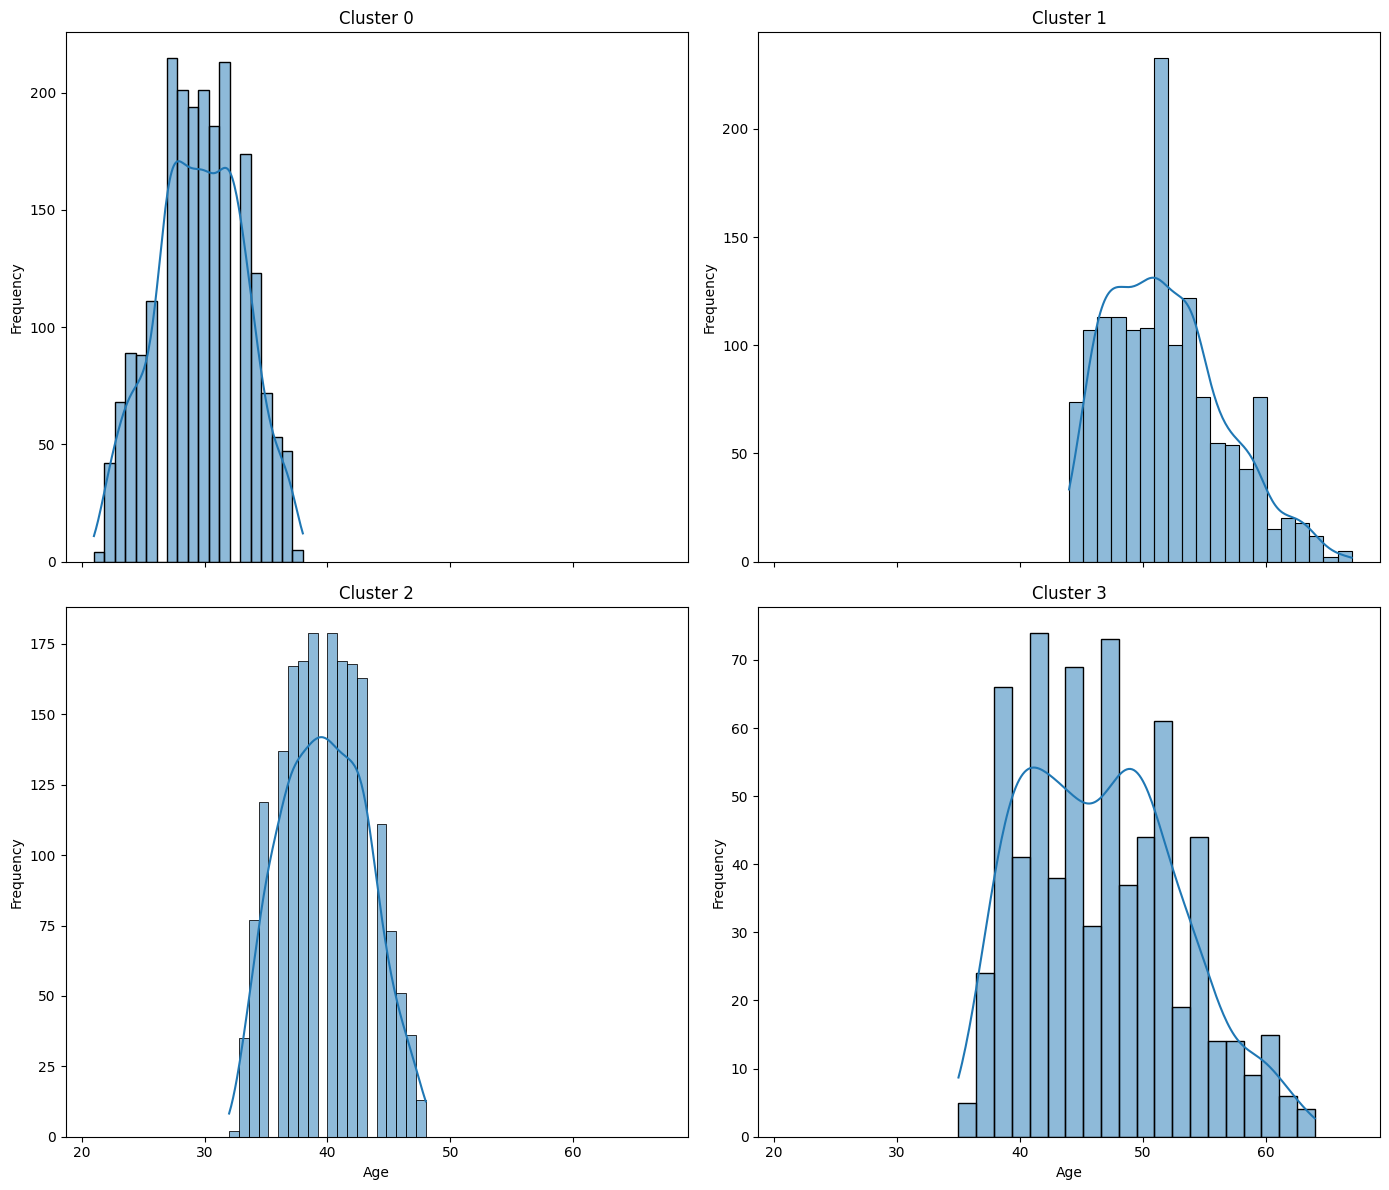

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4개의 서브플롯으로 클러스터별 Age 분포 막대그래프 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True)

for cluster_id, ax in zip(sorted(train['cluster'].unique()), axes.flatten()):
    cluster_data = train[train['cluster'] == cluster_id]
    sns.histplot(cluster_data['Age'], bins=20, kde=True, ax=ax)
    ax.set_title(f'Cluster {cluster_id}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


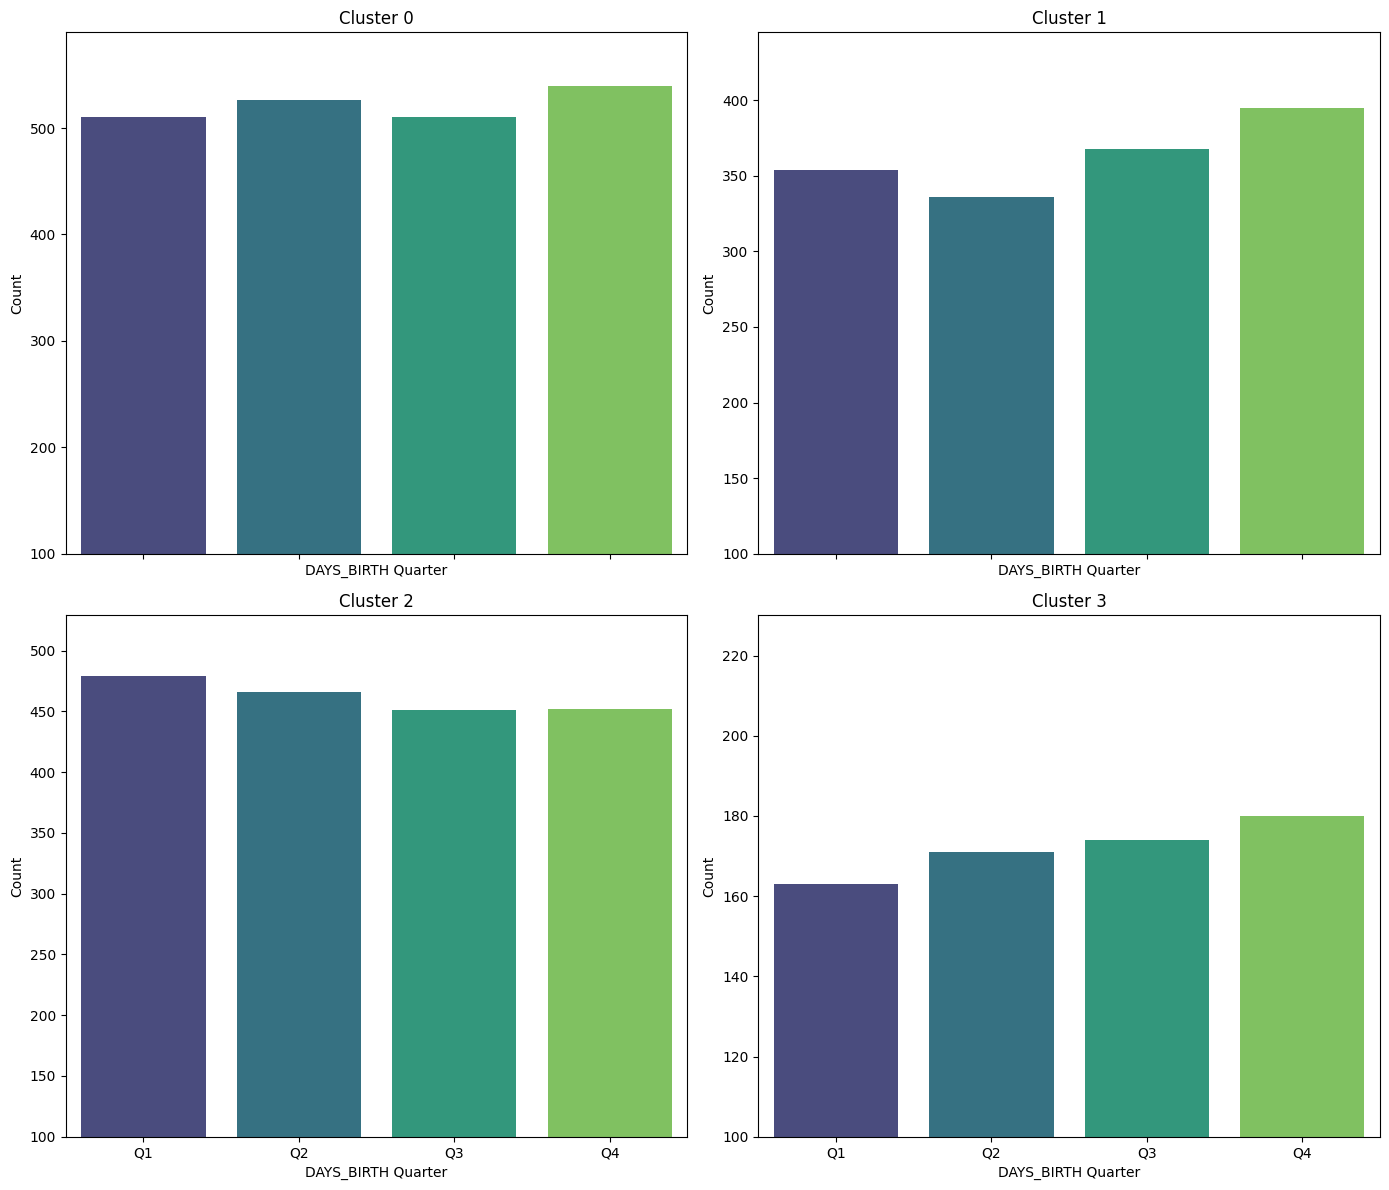

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4개의 서브플롯으로 클러스터별 Age 분포 막대그래프 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True)

# DAYS_BIRTH_month를 4분기로 묶기
train['DAYS_BIRTH_quarter'] = pd.cut(train['DAYS_BIRTH_month'], bins=[-1, 2, 5, 8, 11], labels=['Q1', 'Q2', 'Q3', 'Q4'])

for cluster_id, ax in zip(sorted(train['cluster'].unique()), axes.flatten()):
    cluster_data = train[train['cluster'] == cluster_id]
    sns.countplot(x='DAYS_BIRTH_quarter', data=cluster_data, ax=ax, palette='viridis')
    ax.set_title(f'Cluster {cluster_id}')
    ax.set_xlabel('DAYS_BIRTH Quarter')
    ax.set_ylabel('Count')
    ax.set_ylim(100, max(cluster_data['DAYS_BIRTH_quarter'].value_counts()) + 50)


plt.tight_layout()
plt.show()


In [ ]:
DAYS_BIRTH_month